$\bf{Теорема~1.}$ 

Пусть случайная величина $\xi$ равномерно распределена на (0, 1), $F(x) - $ непрерывная функция
распределения. Тогда функция распределения случайной величины $ \eta = F^{−1}(\xi)$ равна $F(x).$

Необходимым условием моделирования случайных величин является использование только функции
$\bf{scipy.stats.uniform.rvs}$, с помощью которой можно смоделировать равномерное распределение на
(0, 1). Все остальные распределения нужно получить из неё самостоятельно, пользуясь фактами из курса
теории вероятностей (предельными теоремами и теоремой 1).

In [1]:
from scipy.stats import uniform
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.style as style
style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
def make_unif(size, theta=1):
    x_unif = uniform.rvs(size=size, scale=1)
    return x_unif

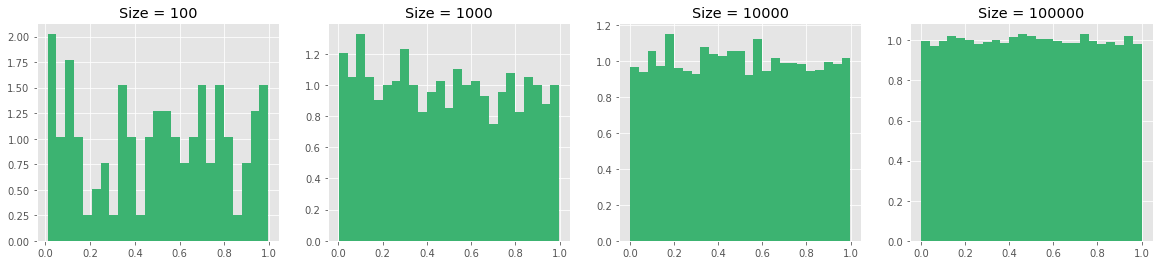

In [3]:
size_list = [100, 1000, 10000, 100000]

fig, ax = plt.subplots(1, len(size_list), figsize=(5 * len(size_list), 4))

for i, size in enumerate(size_list):
    ax[i].hist(make_unif(size), bins=25, color='mediumseagreen', normed=True)
    ax[i].set_title('Size = {}'.format(size))
plt.show()

## Задание 1

а) Предложите способ моделирования последовательности независимых испытаний Бернулли $X_1, X_2, ..., X_n$ таких, что $P(X_n = 1) = 1 − P(X_n = 0) = p$.

In [4]:
def make_ber(size, p):
    x_unif = make_unif(size=size)
    x_ber = x_unif.copy()
    x_ber[x_unif > p] = 0
    x_ber[x_unif < p] = 1
    return x_ber

b) Смоделируйте последовательность независимых испытаний Бернулли, указанную в пункте a), с
$p$ = 0, 4 и $n$ = 1000. Вычислите частоты $\frac{μ_k}{k}$, где $μ_k = X_1 + ... + X_k$, при $k$ = 1, ..., 1000. Постройте график зависимости частот от величины $k$ = 1, ..., 1000. Какую теорему иллюстрирует этот пример?

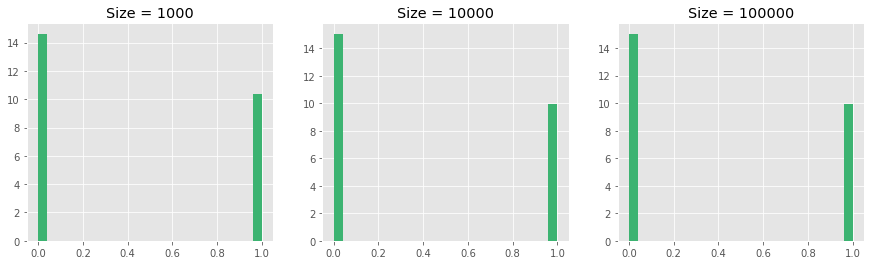

In [5]:
size_list = [1000, 10000, 100000]
p = 0.4

fig, ax = plt.subplots(1, len(size_list), figsize=(5*len(size_list), 4))

for i, size in enumerate(size_list):
    ax[i].hist(make_ber(size, p), bins=25, color='mediumseagreen', normed=True)
    ax[i].set_title('Size = {}'.format(size))
plt.show()

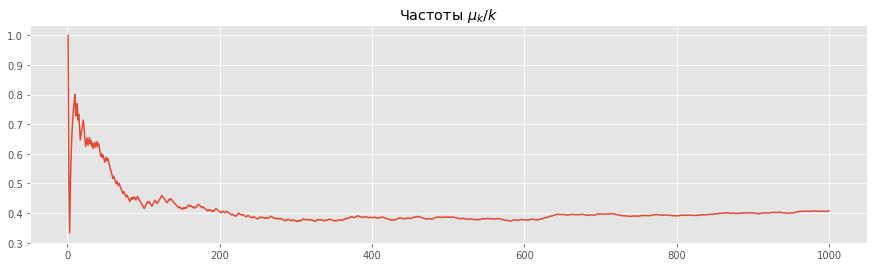

In [6]:
size, p = 1000, 0.4
x_ber = make_ber(size, p)
k_list = np.arange(1, size+1)
mu_k = np.array(list(map(lambda k: np.sum(x_ber[:k]) / k, k_list)))

plt.figure(figsize=(15, 4))
plt.plot(k_list, mu_k)
plt.title('Частоты $\mu_k/k$')
plt.show()

## Задание 2

a) Предложите способ моделирования независимых случайных величин $X_1, X_2, ..., X_n$, где $$P(X_i \leq t) = 1 − e^{−t/a}, ~ t > 0 ~ (a > 0 - постоянная) ~ i = 1, 2, ..., n.$$


In [7]:
def make_exp(size, a=1):
    x_unif = make_unif(size=size)
    x_exp = -a * np.log(x_unif)
    return x_exp

b) Смоделируйте независимые показательно распределенные величины $X_1, X_2, ..., X_n$, с $a = 1$, $n = 100$. Постройте график эмпирической функции распределения и на том же графике построте истинную функцию распределения. Постройте гистограмму и на том же графике постройте истинную
функцию плотности.

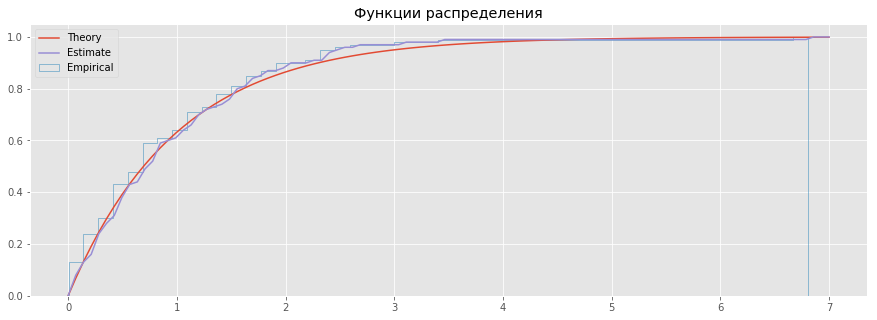

In [8]:
a = 1
size = 100
xlim = np.linspace(0, 7, size)
x_ber = make_exp(size, a=1)

P_true = 1 - np.exp(-xlim / a)
P_est = list(map(lambda i: np.sum(x_ber < i)/size, xlim))


plt.figure(figsize=(15, 5))


plt.plot(xlim, P_true, '-', label = 'Theory')
plt.hist(x_ber, bins=50, histtype='step',
        cumulative=True, normed=True,
        label = 'Empirical')
#optional
plt.plot(xlim, P_est, '-', label = 'Estimate')

plt.legend()
plt.title('Функции распределения')
plt.show()

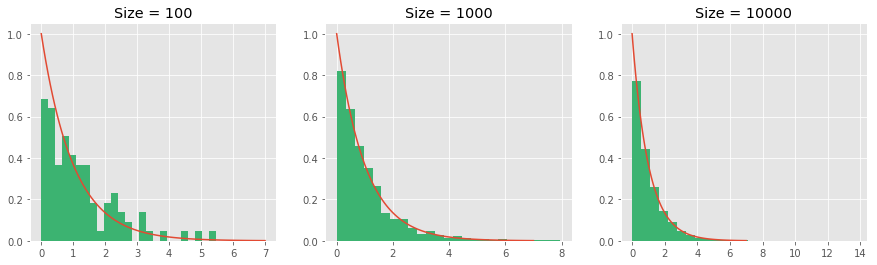

In [9]:
a = 1
size_list = [100, 1000, 10000]
xlim = np.linspace(0, 7, 100)

fig, ax = plt.subplots(1, len(size_list), figsize=(5*len(size_list), 4))

for i, size in enumerate(size_list):
    
    p_true = np.exp(-xlim * a) / a
    ax[i].plot(xlim, p_true, '-', label = 'Theory')
    ax[i].hist(make_exp(size), bins=25, normed=True, 
               label = 'Estimate', color='mediumseagreen')
    ax[i].set_title('Size = {}'.format(size))
plt.show()

## Задание 3

a) Используя центральную предельную теорему, укажите способ моделирования приближенно нормально распределенных случайных величин;

In [10]:
def make_norm(size, N=0, mu = 0, sigma = 1):
    mu_unif = 1. / 2.
    sigma_unif = np.sqrt(1. / 12.)
    if N == 0:
        x_norm = list(map(lambda k: (make_unif(size=size).sum() - mu_unif * size) / (sigma_unif * np.sqrt(size)), np.arange(size)))
    else:
        x_norm = list(map(lambda k: (make_unif(size=N).sum() - mu_unif * N) / (sigma_unif * np.sqrt(N)), np.arange(size)))
    x_norm = np.array(x_norm) * sigma + mu
    return x_norm

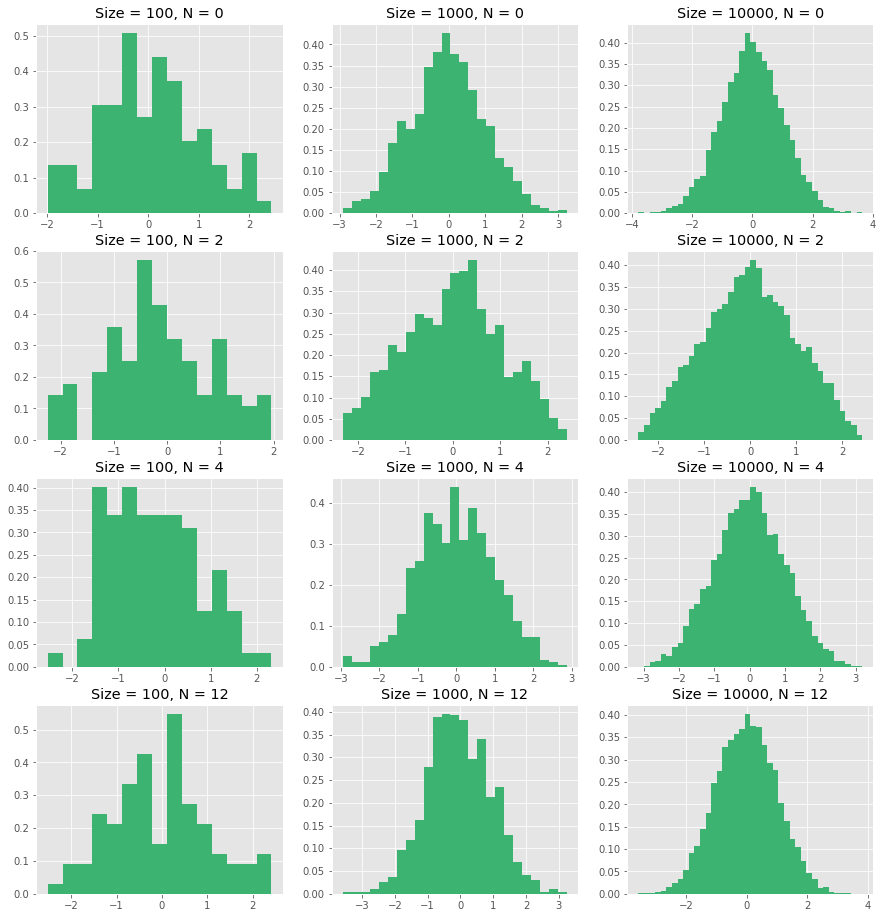

In [11]:
size_list = [100, 1000, 10000]
bins_list = [15, 25, 40]
N_list = [0, 2, 4, 12]

fig, ax = plt.subplots(len(N_list), len(size_list), figsize=(5*len(size_list), 4*len(N_list)))

for j, N in enumerate(N_list):
    for i, size in enumerate(size_list):
        ax[j,i].hist(make_norm(size, N), bins=bins_list[i], color='mediumseagreen', normed=True)
        ax[j,i].set_title('Size = {}, N = {}'.format(size, N))
plt.show()

b) Пусть $X_{N_1} , ..., X_{N_n} —$ реализация последовательности приближенно нормально распределенных чисел, каждое из которых получено с помощью суммирования, центрирования и нормировки N равномерно распределенных слагаемых (ЦПТ). Получите три реализации (при $N = 2, 4, 12$) выборок с $n = 100$, $a = 0$, $σ^2 = 1$. Для каждой выборки постройте график эмпирической функции распределения и на том же графике постройте истинную функцию распределения. Постройте гистограмму и на том же графике постройте истинную функцию плотности. Получите оценки $a$ и $σ^2$. Вычислите третий и четвертый выборочные центральные моменты и сравните их с истинными значениями теоретических моментов.

In [12]:
from scipy.special import erf

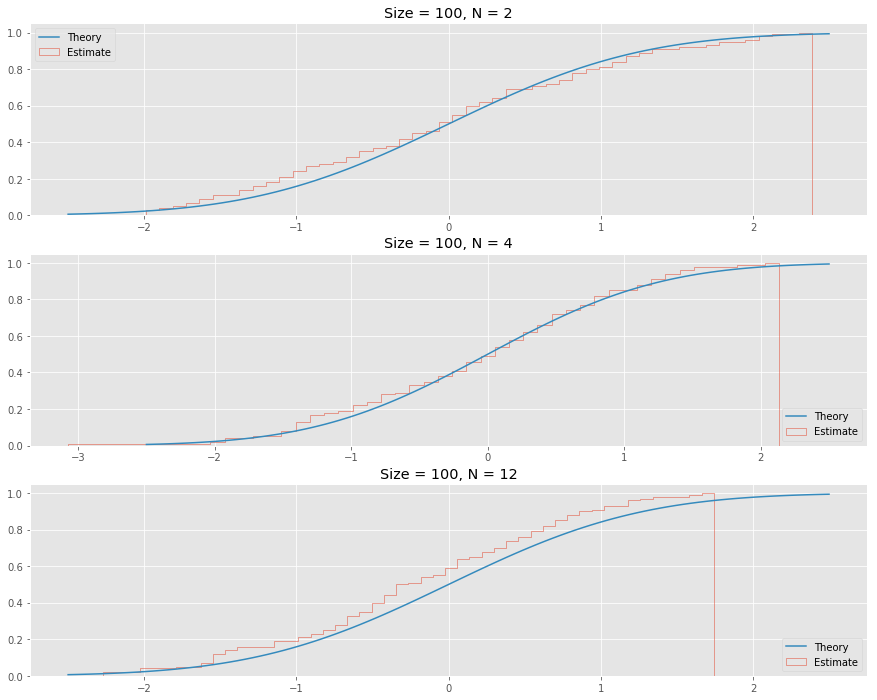

In [13]:
size = 100
N_list = [2, 4, 12]
xlim = np.linspace(-2.5, 2.5, 100)
P_th = 1./2 * (1 + np.array(erf(xlim / np.sqrt(2.))))

fig, ax = plt.subplots(len(N_list), 1, figsize=(15, 4*len(N_list)))

for j, N in enumerate(N_list):
    ax[j].hist(make_norm(size, N), bins=50,
               normed=True, cumulative=True,
               histtype='step', label='Estimate')
    ax[j].plot(xlim, P_th, '-', label='Theory')
    ax[j].set_title('Size = {}, N = {}'.format(size, N))
    ax[j].legend()
plt.show()

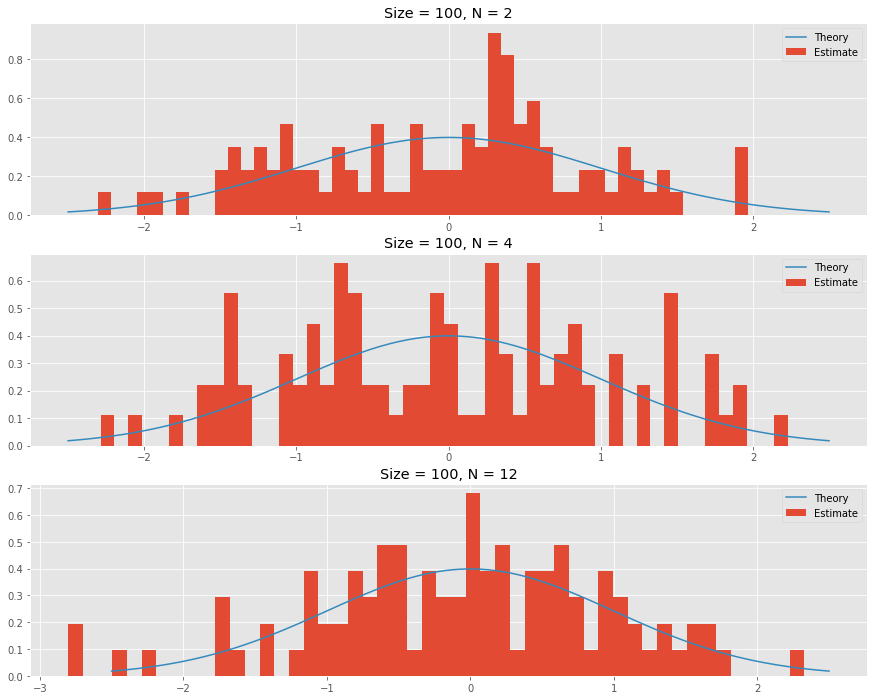

In [14]:
size = 100
N_list = [2, 4, 12]
xlim = np.linspace(-2.5, 2.5, 100)
P_th = 1. / np.sqrt(2 * np.pi) * np.exp(-xlim**2 / 2.)

fig, ax = plt.subplots(len(N_list), 1, figsize=(15, 4*len(N_list)))

for j, N in enumerate(N_list):
    ax[j].hist(make_norm(size, N), bins=50,
               normed=True, label='Estimate')
    ax[j].plot(xlim, P_th, '-', label='Theory')
    ax[j].set_title('Size = {}, N = {}'.format(size, N))
    ax[j].legend()
plt.show()

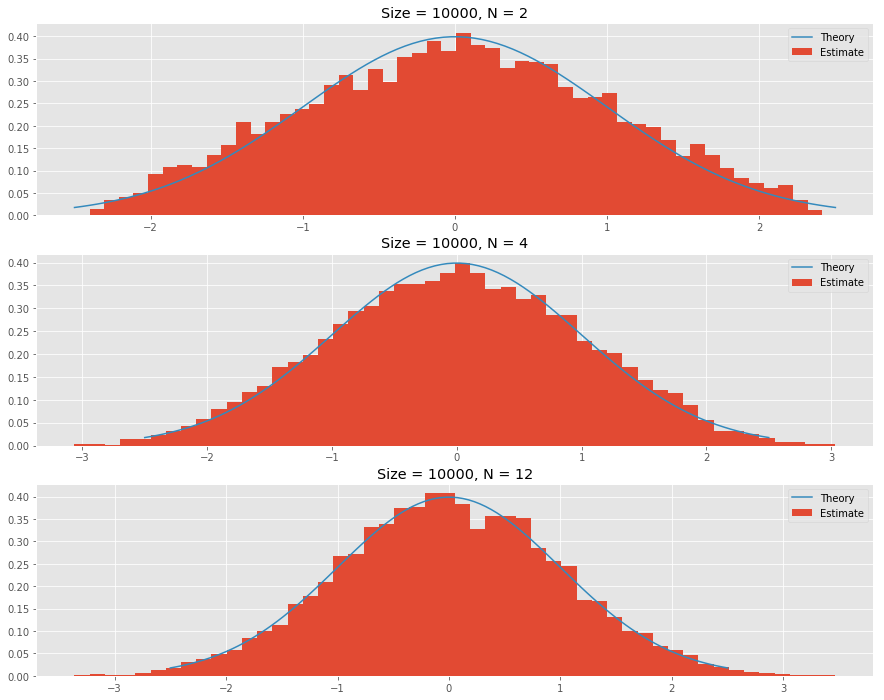

In [15]:
size = 10000
N_list = [2, 4, 12]
xlim = np.linspace(-2.5, 2.5, 100)
P_th = 1. / np.sqrt(2 * np.pi) * np.exp(-xlim**2 / 2.)

fig, ax = plt.subplots(len(N_list), 1, figsize=(15, 4*len(N_list)))

for j, N in enumerate(N_list):
    ax[j].hist(make_norm(size, N), bins=50,
               normed=True, label='Estimate')
    ax[j].plot(xlim, P_th, '-', label='Theory')
    ax[j].set_title('Size = {}, N = {}'.format(size, N))
    ax[j].legend()
plt.show()

## Задание 4

a) Укажите способ моделирования выборки из биномиального распределения $Bi(k, p)$ (использовать задачу 1). Смоделируйте выборку размера $n = 10, 100, 1000$ из биномиального распределения с параметрами $k = 100$, $p = 0, 01$. Постройте гистограммы;

In [16]:
def make_bin(size, k, p):
    x_bin = np.array(list(map(lambda size: np.sum(make_ber(k, p)), np.arange(size))))
    return x_bin

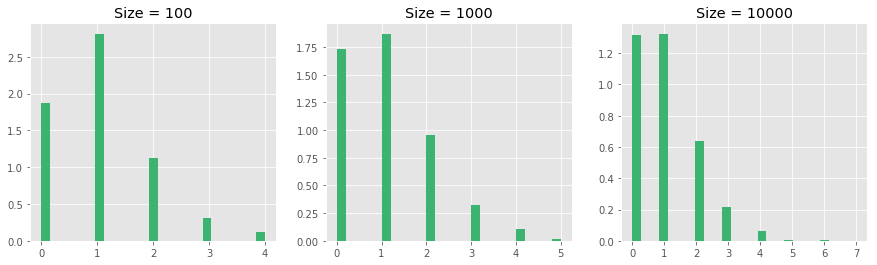

In [17]:
size_list = [100, 1000, 10000]
k, p = 100, 0.01

fig, ax = plt.subplots(1, len(size_list), figsize=(5*len(size_list), 4))

for i, size in enumerate(size_list):
    ax[i].hist(make_bin(size, k, p), bins=25,
               color='mediumseagreen', normed=True)
    ax[i].set_title('Size = {}'.format(size))
plt.show()

b) Смоделируйте выборку размера $n = 10, 100, 1000$ из распределения Пуассона с параметром $λ = 1$ (использовать пункт a). Выберите количество бернуллиевских случайных величин, которое необходимо взять и поясните свой выбор. Постройте гистограмму частот. Какую теорему иллюстрирует
данный пример?

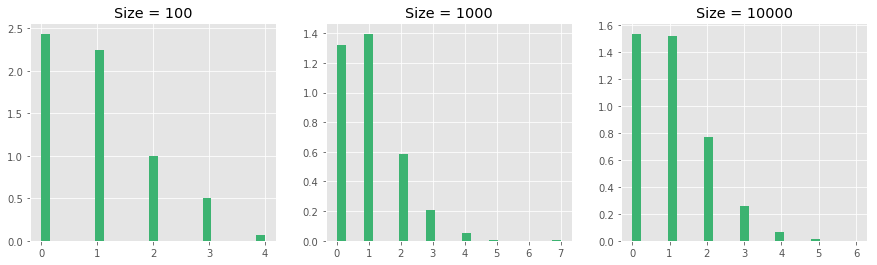

In [18]:
size_list = [100, 1000, 10000]
k, p = 10000, 0.0001

fig, ax = plt.subplots(1, len(size_list), figsize=(5*len(size_list), 4))

for i, size in enumerate(size_list):
    ax[i].hist(make_bin(size, k, p), bins=25,
               color='mediumseagreen', normed=True)
    ax[i].set_title('Size = {}'.format(size))
plt.show()

$n \cdot p \rightarrow \lambda $ где $ n \rightarrow \infty$, а $p \rightarrow 0$

c) Найти методом моментов точечную оценку параметра p биномиального распределения и оценить вероятность $p_0 = P(ξ = 0)$. Найти методом максимального правдоподобия точечную оценку
неизвестного параметра λ распределения Пуассона.

In [19]:
def MM(x, method):
    if method == 'bin':
        moment_1 = np.mean(x)
        moment_2 = np.mean(x**2)
        p = 1 - moment_2 / moment_1 + moment_1
        p = 0 if p < 0 else p
        p = 1 if p > 1 else p
        return p
    if method == 'norm':
        moment_1 = np.mean(x)
        moment_2 = np.mean(x**2)
        
        mu = moment_1
        sigma = np.sqrt(moment_2 - moment_1**2)
        
        return [mu, sigma]
    
    if method == 'unif':
        moment_1 = np.mean(x)
        theta = 2 * moment_1
        return theta

In [20]:
size_list = [10, 100, 1000]
k, p = 100, 0.01
moment_1 = k*p
moment_2 = k*p*(1 - p + k*p)
print('1st moment = {}, 2st moment = {}'.format(moment_1, moment_2))

for i, size in enumerate(size_list):
    x_bin = make_bin(size, k, p)
    p_0 = np.sum(x_bin == 0)/len(x_bin)
    p_e = MM(x_bin, method='bin')
    print('size = {} \n\tEstimante: p = {:.2f} and p0 = {:.2f}'.format(size, p_e, p_0))

1st moment = 1.0, 2st moment = 1.99
size = 10 
	Estimante: p = 0.10 and p0 = 0.60
size = 100 
	Estimante: p = 0.00 and p0 = 0.42
size = 1000 
	Estimante: p = 0.03 and p0 = 0.36


In [21]:
def MLE(x, method):
    if method == 'bin':
        theta = np.mean(x)
        return theta
    if method == 'norm':
        theta_1 = np.mean(x)
        theta_2 = np.sqrt(np.mean((x - np.mean(x))**2))
        return [theta_1, theta_2]
    if method == 'puason':
        theta = np.mean(x)
        return theta
    if method == 'unif':
        theta = np.max(x)
        return theta

In [22]:
size_list = [10, 100, 1000]
k, p = 10**5, 1e-5
assert k * p == 1
print('Lambda = 1')

for i, size in enumerate(size_list):
    x_bin = make_bin(size, k, p)
    lamb = MLE(x_bin, method='puason')
    print('size = {} \n\tEstimante: Lambda = {:.2f}'.format(size, lamb))

Lambda = 1
size = 10 
	Estimante: Lambda = 0.60
size = 100 
	Estimante: Lambda = 0.88
size = 1000 
	Estimante: Lambda = 1.00


## Задание 5

Смоделируйте выборки $X_1, ..., X_N$ объема $N = 1000$, и для каждой подвыборки $X_1, ..., X_n$, $n =
1, ..., N$ получите оценки методом моментов и методом максимального правдоподобия параметров
следующих распределений:

a) $N(\Theta_1, \Theta_2^2)$, при моделировании положите $\Theta_1 = 1$, $\Theta_2^2 = 4.$

b) $Bi(1, \Theta)$, при моделировании положите $\Theta = 0, 7$.

c)$R(0, \Theta)$, при моделировании положите $\Theta = 1$.

Постройте график зависимости значений оценки от величины $n$. Как меняется качество оценки с
ростом $n$? Для оценок, полученных в пунктах b) и c) проверить их несмещённость и состоятель-
ность?

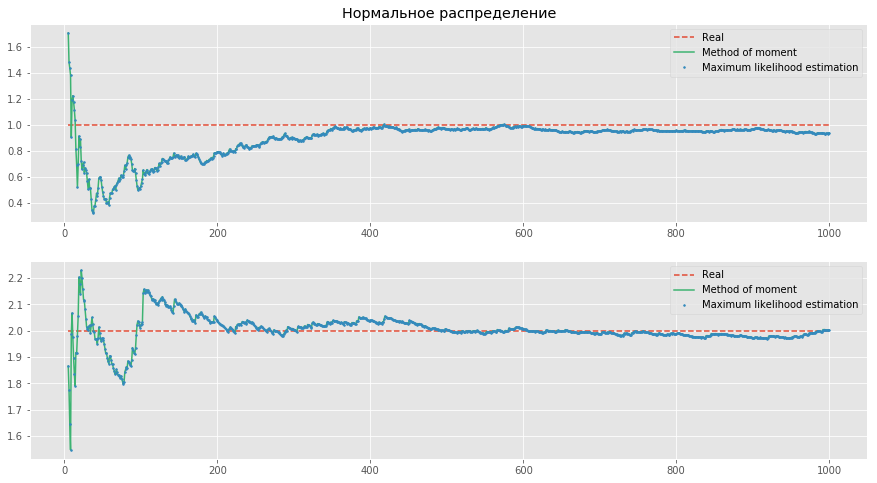

In [23]:
size = 1000
theta_1, theta_2 = 1, 2
x_norm = make_norm(size, mu=theta_1, sigma=theta_2)
k_list = np.arange(5, size+1)

MM_theta = np.array(list(map(lambda k: MM(x_norm[:k], method='norm'), k_list)))
MLE_theta = np.array(list(map(lambda k: MLE(x_norm[:k], method='norm'), k_list)))

fig, ax = plt.subplots(2, 1, figsize=(15,8))

ax[0].set_title('Нормальное распределение')
ax[0].plot(k_list, [theta_1] * len(k_list),'--', label = 'Real')
ax[0].plot(k_list, MM_theta.T[0], '-', label = 'Method of moment', color = 'mediumseagreen')
ax[0].plot(k_list, MLE_theta.T[0], 'o', ms=1.5, label = 'Maximum likelihood estimation')
ax[0].legend()

ax[1].plot(k_list, [theta_2] * len(k_list), '--', label = 'Real')
ax[1].plot(k_list, MM_theta.T[1], '-', label = 'Method of moment', color = 'mediumseagreen')
ax[1].plot(k_list, MLE_theta.T[1], 'o', ms=1.5, label = 'Maximum likelihood estimation')
ax[1].legend()

plt.show()

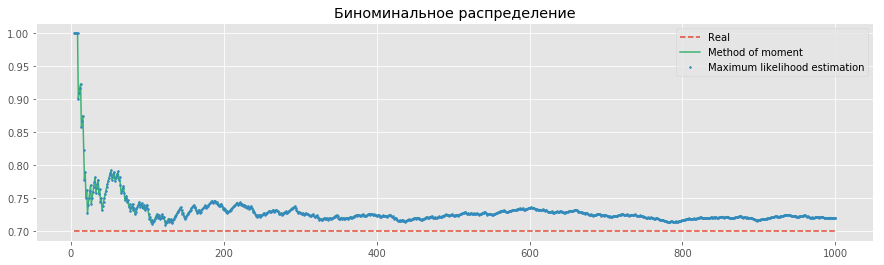

In [24]:
size = 1000
k, theta = 1, 0.7
#При k = 1 Bin распредление перехожит в распредление Бернули.
x_bin = make_bin(size, k=k, p=theta)
k_list = np.arange(5, size+1)

MM_theta = np.array(list(map(lambda k: MM(x_bin[:k], method='bin'), k_list)))
MLE_theta = np.array(list(map(lambda k: MLE(x_bin[:k], method='bin'), k_list)))

fig, ax = plt.subplots(1, 1, figsize=(15,4))

ax.set_title('Биноминальное распределение')
ax.plot(k_list, [theta] * len(k_list),'--', label = 'Real')
ax.plot(k_list, MM_theta, '-', label = 'Method of moment', color = 'mediumseagreen')
ax.plot(k_list, MLE_theta, 'o', ms=1.5, label = 'Maximum likelihood estimation')
ax.legend()


plt.show()

Оценка смещенная, но состоятельная

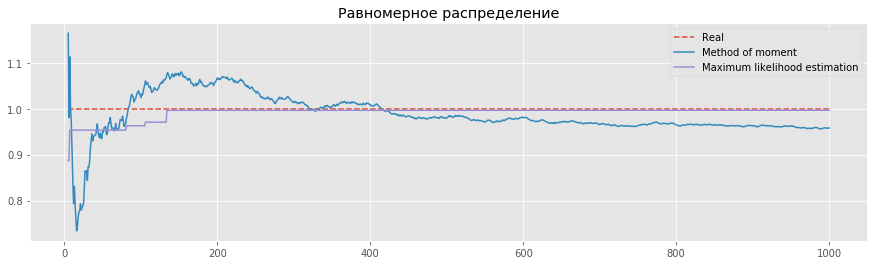

In [25]:
size = 1000
theta = 1
x_unif = make_unif(size, theta=theta)
k_list = np.arange(5, size+1)

MM_theta = np.array(list(map(lambda k: MM(x_unif[:k], method='unif'), k_list)))
MLE_theta = np.array(list(map(lambda k: MLE(x_unif[:k], method='unif'), k_list)))

fig, ax = plt.subplots(1, 1, figsize=(15,4))

ax.set_title('Равномерное распределение')
ax.plot(k_list, [theta] * len(k_list),'--', label = 'Real')
ax.plot(k_list, MM_theta, '-', label = 'Method of moment')
ax.plot(k_list, MLE_theta, '-', label = 'Maximum likelihood estimation')
ax.legend()


plt.show()

Оценка несмещенная, но не состоятельная

## Задание 6

На высоте 1 метр от точки $\Theta$ находится источник $\gamma$-излучения, причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i,$ $i = 1, ..., n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости. Известно, что $X_i$ имеет распределение Коши.

a) Найти оценку максимального правдоподобия для параметра сдвига $\Theta$ распределения Коши (плотность имеет вид: $p(x) = \dfrac{1}{π(1+(x−\Theta)^2)}$) по выборке из двух наблюдений, если: 1) $X_1 = −1$, $X_2 = 1$; 2)$X_1 = −2$, $X_2 = 2$;

$$ L = \prod\limits_{i = 1}^{n} p(x_i) $$

$$ \ln{L} = \sum\limits_{i = 1}^{n} \ln{p(x_i)} = - \sum\limits_{i = 1}^{n} (\ln{\pi} + \ln{(1+(x-\Theta)^2)} )$$

$$ \frac{\partial \ln{L}}{\partial \Theta}  = - \sum\limits_{i = 1}^{n} \frac{2(x_i - \Theta)}{1+(x-\Theta)^2}=0$$

Причем при двух наблюдениях $X_1$ и $X_2$ последнеее условие записывается в простом виде:

$$ (X_1 - \Theta)(1 + (X_2 - \Theta)^2) + (X_2 - \Theta)(1 + (X_1 - \Theta)^2) = 0 $$

Упростив это выражение, получим:

$$ 2 \Theta^3 - 3(X_1 + X^2)\Theta^2 + ((X_1+X^2)^2 + 2 X_1 X_2 + 2)\Theta - (X_1 + X_2)(1 + X_1 X_2) = 0 $$

а) $X_1 + X_2 = 0$, $X_1 \cdot X_2 = -1$:

$$ 2\Theta^3  = 0 \Rightarrow \Theta = 0 $$

а) $X_1 + X_2 = 0$, $X_1 \cdot X_2 = -4$:

$$ 2\Theta^3 - 2 \cdot 3 \Theta = 0 = 0 \Rightarrow \Theta(\Theta^2 - 3) = 0 $$

$$ \left[ 
      \begin{gathered}
          \Theta = 0 \\
          \Theta = \sqrt{3} \\
          \Theta = -\sqrt{3}
      \end{gathered}
   \right.
$$

b) Убедитесь в том, что с применением метода моментов и метода максимального правдоподобия для оценки параметра сдвига $\Theta$ возникают трудности;

$\bf{Метод~моментов:}$

Для вычсиления функий моментов приходится брать два интеграла :

$$ \int_{-\infty}^{\infty} \frac{x \cdot dx}{π(1+(x−\Theta)^2)} ~~\text{и}~~ \int_{-\infty}^{\infty} \frac{x^2 \cdot dx}{π(1+(x−\Theta)^2)} $$

Такие интегралы Лебега не определены (т.к. показатель x больше или равен 1). Иначе говоря, математическое ожидание такого распределения не определено, а диспресия бесконечна 

$\bf{Метод~максимального~правдоподобия:}$

В общем виде при $n \ge 2$ найти явную формулу для $\Theta$ задача весьма нетривиальная и может быть решена только метода численного дифференцирования

c) Смоделируйте выборку $X_1, ..., X_N$ объема $N = 1000$ для распределения Коши и проверьте, что
выборочная медиана $\hat{\Theta}_n = x_{med}$ является хорошей оценкой параметра $\Theta$, построив график зависимости от $n = 1, ..., N.$ При моделировании положить $\Theta = 0$.

In [26]:
from scipy.stats import cauchy

def make_cauchy(size, theta=0):
    x_cauchy = cauchy.rvs(size=size)
    return x_cauchy

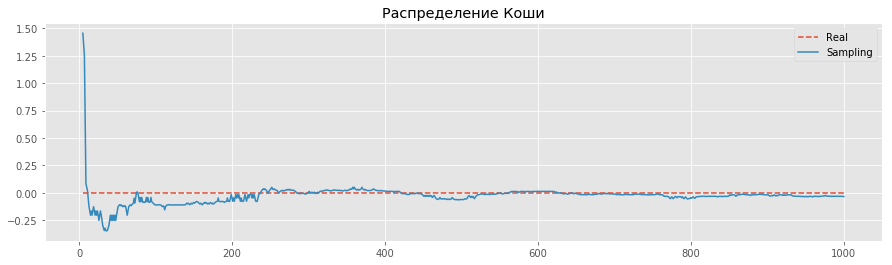

In [27]:
size = 1000
theta = 0
x_cauchy = make_cauchy(size, theta)

S_theta = np.array(list(map(lambda k: np.median(x_cauchy[:k]), k_list)))

fig, ax = plt.subplots(1, 1, figsize = (15, 4))

ax.set_title('Распределение Коши')
ax.plot(k_list, [theta] * len(k_list),'--', label = 'Real')
ax.plot(k_list, S_theta, '-', label = 'Sampling')
ax.legend()

plt.show()

## Задание 7

Смоделируйте выборки $X_1, ..., X_N$ объема $N = 1000$ из равномерного распределения $R(0, \Theta)$ при $\Theta = 1$, и оцените методом моментов и методом максимального правдоподобия параметр $\Theta$ для каждой подвыборки $X_1, ..., X_n$, $n = 1, ..., N.$ Постройте график зависимости полученных оценок от $n$ и сравните их. Являются ли рассматриваемые оценки состоятельными?

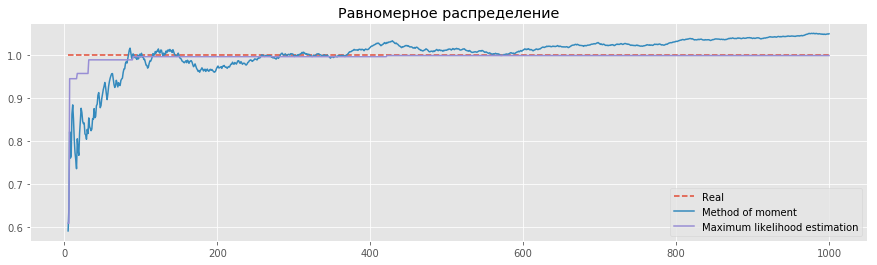

In [28]:
size = 1000
theta = 1
x_unif = make_unif(size, theta=theta)
k_list = np.arange(5, size+1)

MM_theta = np.array(list(map(lambda k: MM(x_unif[:k], method='unif'), k_list)))
MLE_theta = np.array(list(map(lambda k: MLE(x_unif[:k], method='unif'), k_list)))

fig, ax = plt.subplots(1, 1, figsize=(15,4))

ax.set_title('Равномерное распределение')
ax.plot(k_list, [theta] * len(k_list),'--', label = 'Real')
ax.plot(k_list, MM_theta, '-', label = 'Method of moment')
ax.plot(k_list, MLE_theta, '-', label = 'Maximum likelihood estimation')
ax.legend()


plt.show()